In [44]:
import sys
from Bio import SeqIO
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import comparativesrna as srna
import json

run_all = False

print (sys.version)
print(sys.executable)

3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
/Users/thomasnicholson/anaconda3/bin/python


In [3]:
alignment_file_counts = pd.read_csv("/Users/thomasnicholson/phd/RNASeq/srna_seqs/version_1/predicted/original_stats_all.txt", 
                                    header=None, delim_whitespace=True, names=list('abcdef'))
alignment_file_counts = alignment_file_counts.loc[alignment_file_counts['a'] == 'Number_of_sequences:']
alignment_file_counts = alignment_file_counts[['b', 'c']]
alignment_file_counts.columns = ['count', 'id']
alignment_file_counts['id'] = alignment_file_counts['id'].str.replace('.stk', '')
alignment_file_counts.set_index('id', inplace=True)
target_counts = alignment_file_counts.to_dict()

alignDat = pd.read_csv("/Users/thomasnicholson/phd/RNASeq/srna_seqs/version_1/predicted/predicted_genomic_sequence_matches.txt", header=None, delim_whitespace=True)
alignDat = alignDat.iloc[:,[0,2]]
alignDat.columns = ["details", "query_id"]
alignDat[["target_contig", "coord"]] = alignDat.details.str.split("/", expand = True)
alignDat[["target_start", "target_end"]] = alignDat.coord.str.split("-", expand = True)
alignDat = alignDat[["query_id", "target_contig", "target_start", "target_end"]]
alignDat["target_start"] = alignDat["target_start"].astype(str).astype(int)
alignDat['target_start'].dtypes
alignDat["target_end"] = alignDat["target_end"].astype(str).astype(int)
alignDat['target_end'].dtypes
alignDat = alignDat.sort_values(by=['target_start'])
display(alignDat)

,query_id,target_contig,target_start,target_end
143383,GCA_000007565.2_344,NZ_BAZX01000065.1,1,379
1126539,GCA_002220715.1_275,NZ_AZUM01000013.1,1,131
1295780,GCA_002355295.1_49,NZ_JMMB01000008.1,1,278
813019,GCA_000747565.1_502,NZ_CYSA01000007.1,1,184
1437956,GCA_002813995.1_333,NZ_JMKI01000005.1,1,97
...,...,...,...,...
259376,GCA_000017745.1_1926,NC_010162.1,12944881,12945103
134960,GCA_000007565.2_306,NC_010162.1,12989477,12989675
134434,GCA_000007565.2_304,NC_010162.1,12990357,12990210
1982911,GCA_900243355.1_863,NC_010162.1,13025761,13026106


In [7]:
target_contigs = alignDat.target_contig.unique()
query_ids = alignDat.query_id.unique()

In [8]:
len(target_contigs)

26412

In [9]:
run_all = False
if run_all == True:
    overlapping_ids = []
    lengths = []
    start_val = 0
    end_val = 0
    overlaps = []
    for contig in target_contigs:
        print(contig)
        subsetDat =  alignDat.loc[alignDat['target_contig'] == contig]
        overlaps = srna.get_overlap_vals(subsetDat, overlaps)
    df = pd.DataFrame(data = overlaps)
    df.to_csv('/Users/thomasnicholson/phd/RNASeq/srna_seqs/version_1/predicted/overlaps_data.csv', index=False)
else:
    overlaps = pd.read_csv("/Users/thomasnicholson/phd/RNASeq/srna_seqs/version_1/predicted/overlaps_data.csv", header=None, delim_whitespace=True)


NZ_BAZX01000065.1
NZ_AZUM01000013.1
NZ_JMMB01000008.1
NZ_CYSA01000007.1
NZ_JMKI01000005.1
NZ_LGAA01000103.1
NZ_JAGN01000002.1
NZ_LASZ01000042.1
NZ_LASZ01000014.1
NZ_ATHQ01000002.1
NZ_AMRK01000035.1
NZ_AQWH01000071.1
NZ_ATXL01000106.1
NZ_AQVE01000030.1
NZ_ATXL01000013.1
NC_016585.1
NZ_AHAM01000069.1
NZ_JAGN01000037.1
NZ_AJTV01000100.1
NZ_AAWL01000048.1
NZ_AQOF01000032.1
NZ_LASZ01000008.1
NZ_LXEQ01000068.1
NZ_AFUJ01000032.1
NZ_JNIN01000001.1
NZ_JMSZ01000009.1
NZ_AYJW01000169.1
NZ_CAPH01000054.1
NZ_AEPR01000520.1
NZ_JIBO01000009.1
NZ_CYZA01000043.1
NZ_LGTK01000163.1
NZ_ABCK01000004.1
NZ_JRGN01000330.1
NZ_JMIR01000103.1
NZ_LFRI01000393.1
NZ_CAPH01000055.1
NZ_CP011479.1
NZ_CAKP01000114.1
NZ_BAFK01000052.1
NZ_AYJW01000064.1
NZ_JGYG01000006.1
NZ_JAGN01000052.1
NZ_JQMD01000002.1
NZ_ATWA01000156.1
NZ_JIBO01000012.1
NZ_AVPL01000219.1
NZ_ATUE01000004.1
NZ_AEPR01000713.1
NZ_LNAL01000001.1
NZ_LNQV01000108.1
NZ_LNAL01000007.1
NZ_BBDL01000312.1
NZ_AQYH01000009.1
NZ_AVPL01000226.1
NZ_ATWM01000029.1
NZ

KeyboardInterrupt: 

In [12]:
overlaps[:10]

[1.0,
 1.0,
 1.0,
 1.0,
 0.9947089947089947,
 0.9894179894179894,
 1.0,
 1.0,
 1.0,
 1.0]

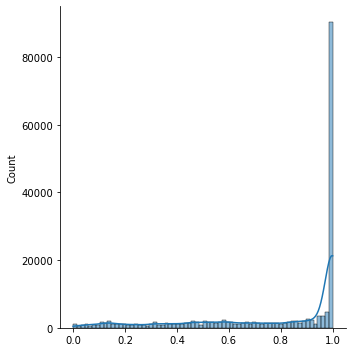

<Figure size 5760x5760 with 0 Axes>

In [13]:
import matplotlib as plt
from matplotlib.pyplot import figure
fig = sns.displot(overlaps, kde=True)
figure(figsize = (80,80))
fig.savefig("/Users/thomasnicholson/phd/RNASeq/figures/displot.svg", dpi=100)

In [11]:
run_all = False
if run_all == True:
    d = {}
    for contig in target_contigs:
        print(contig)
        subsetDat =  alignDat.loc[alignDat['target_contig'] == contig]
        overlap_list = srna.get_overlap_list(subsetDat = subsetDat)
        d = srna.get_overlap_count(overlap_list = overlap_list, d = d)
        json_data = json.dumps(d)
        file = open('/Users/thomasnicholson/bin/python_git/python_files/dict.json', 'w')
        file.write(json_data)
        file.close()
else:
    with open('/Users/thomasnicholson/bin/python_git/python_files/dict.json', 'r') as read_file:
        d = json.load(read_file)

NZ_BAZX01000065.1
NZ_AZUM01000013.1
NZ_JMMB01000008.1
NZ_CYSA01000007.1
NZ_JMKI01000005.1
NZ_LGAA01000103.1
NZ_JAGN01000002.1
NZ_LASZ01000042.1
NZ_LASZ01000014.1
NZ_ATHQ01000002.1
NZ_AMRK01000035.1
NZ_AQWH01000071.1
NZ_ATXL01000106.1
NZ_AQVE01000030.1
NZ_ATXL01000013.1
NC_016585.1
NZ_AHAM01000069.1
NZ_JAGN01000037.1
NZ_AJTV01000100.1
NZ_AAWL01000048.1
NZ_AQOF01000032.1
NZ_LASZ01000008.1
NZ_LXEQ01000068.1
NZ_AFUJ01000032.1
NZ_JNIN01000001.1
NZ_JMSZ01000009.1
NZ_AYJW01000169.1
NZ_CAPH01000054.1
NZ_AEPR01000520.1
NZ_JIBO01000009.1
NZ_CYZA01000043.1
NZ_LGTK01000163.1
NZ_ABCK01000004.1
NZ_JRGN01000330.1
NZ_JMIR01000103.1
NZ_LFRI01000393.1
NZ_CAPH01000055.1
NZ_CP011479.1
NZ_CAKP01000114.1
NZ_BAFK01000052.1
NZ_AYJW01000064.1
NZ_JGYG01000006.1
NZ_JAGN01000052.1
NZ_JQMD01000002.1
NZ_ATWA01000156.1
NZ_JIBO01000012.1
NZ_AVPL01000219.1
NZ_ATUE01000004.1
NZ_AEPR01000713.1
NZ_LNAL01000001.1
NZ_LNQV01000108.1
NZ_LNAL01000007.1
NZ_BBDL01000312.1
NZ_AQYH01000009.1
NZ_AVPL01000226.1
NZ_ATWM01000029.1
NZ

In [18]:
run_all = False
if run_all == True:
    query_matches = {}
    query_counts = {}
    overlap_percentages = []
    threshold = 0
    for i in range(0, len(query_ids) -1):
        for j in range(i + 1, len(query_ids)):
            ids =[query_ids[i], query_ids[j]]
            ids.sort()
            current_id = "_".join(ids)
            try:
                count = min([target_counts['count'][query_ids[i]], target_counts['count'][query_ids[j]]])
            except KeyError:
                continue
            count = int(count)
            if current_id in d:
                if d[current_id]/count < 1 and d[current_id]/count > threshold:
                    overlap_percentages.append(d[current_id]/count)
                else:
                    overlap_percentages.append(1)
                if d[current_id]/count > threshold:
                    query_matches[current_id] = d[current_id]/count
                    query_counts[current_id] = [d[current_id]/count, count, d[current_id]]
    json_query_matches = json.dumps(query_matches)
    file = open('/Users/thomasnicholson/bin/python_git/python_files/query_matches.json', 'w')
    file.write(json_query_matches)
    file.close()
    json_query_counts = json.dumps(query_counts)
    file = open('/Users/thomasnicholson/bin/python_git/python_files/query_counts.json', 'w')
    file.write(json_query_counts)
    file.close()
else:
    with open('/Users/thomasnicholson/bin/python_git/python_files/query_counts.json', 'r') as read_file:
        query_counts = json.load(read_file)


In [19]:
run_all = False
if run_all == True:
    all_overlaps = {}
    ids_checked = []
    for key, value in d.items():
        ids = key.split("_")
        id1 = "_".join(ids[:3])
        id2 = "_".join(ids[3:])
        all_overlaps, ids_checked, make_new, counter = srna.unique_set_of_overlaps(all_overlaps, ids_checked, id1 = id1, id2 = id2)
        all_overlaps, ids_checked, make_new, counter = srna.unique_set_of_overlaps(all_overlaps, ids_checked, id1 = id2, id2 = id1)
        if make_new == True:
            all_overlaps[id1] = [id2]
    json_all_overlaps = json.dumps(all_overlaps)
    file = open('/Users/thomasnicholson/bin/python_git/python_files/all_overlaps.json', 'w')
    file.write(json_all_overlaps)
    file.close()
else:
    with open('/Users/thomasnicholson/bin/python_git/python_files/all_overlaps.json', 'r') as read_file:
        all_overlaps = json.load(read_file)    

['GCA_000007565.2_13']
['GCA_000007405.1_520']
['GCA_000006765.1_728']
['GCA_000006765.1_830']
['GCA_000006765.1_639']
['GCA_000006765.1_79']
['GCA_000006765.1_80']
['GCA_000006765.1_727']
['GCA_000006765.1_81']
['GCA_000006765.1_638']
['GCA_000006765.1_828']
['GCA_000007565.2_22']
['GCA_000007565.2_206']
['GCA_000007565.2_342']
['GCA_000007565.2_23']
['GCA_000006765.1_637']
['GCA_000006765.1_827']
['GCA_000006765.1_826']
['GCA_000007565.2_108']
['GCA_000007565.2_15']
['GCA_000007565.2_109']
['GCA_000007565.2_207']
['GCA_000007565.2_24']
['GCA_000007565.2_16']
['GCA_000007405.1_557']
['GCA_002220715.1_275']
['GCA_000747565.1_470']
['GCA_002355295.1_49']
['GCA_000210855.2_26']
['GCA_002072655.1_162', 'GCA_000210855.2_345', 'GCA_002220715.1_327', 'GCA_000213655.1_78', 'GCA_002072655.1_227', 'GCA_000213655.1_29', 'GCA_002072655.1_172', 'GCA_000213655.1_16', 'GCA_000210855.2_365', 'GCA_002220715.1_19', 'GCA_000747565.1_145', 'GCA_000210855.2_327', 'GCA_002355295.1_111']
['GCA_000210855.2_2

In [1]:
# all_overlaps

In [112]:
key =  'GCA_002208745.1_77_GCA_002208745.1_78'
ids = key.split("_")
id1 = "_".join(ids[:3])
id2 = "_".join(ids[3:])
if id2 in ids_checked:
    if id2 in all_overlaps:
        print(id2)
    else:
        for item in all_overlaps:
            if id2 in all_overlaps[item]:
                print(item, all_overlaps[item]) 


GCA_000281215.1_63 ['GCA_002208745.1_78', 'GCA_000007565.2_1', 'GCA_002208745.1_78', 'GCA_002208745.1_78', 'GCA_002208745.1_78', 'GCA_000007565.2_2', 'GCA_000281215.1_216', 'GCA_002208745.1_78', 'GCA_000006765.1_1']
GCA_002208745.1_77 ['GCA_002208745.1_78', 'GCA_000007565.2_1', 'GCA_002208745.1_78', 'GCA_000281215.1_216', 'GCA_002208745.1_78', 'GCA_000007565.2_2', 'GCA_002208745.1_78', 'GCA_000006765.1_1']
GCA_000007565.2_2 ['GCA_002208745.1_78']


In [20]:
run_all = False
if run_all == True:
    number_of_ids_overlapping = {}
    
    for key, value in all_overlaps.items():
        number_of_ids_overlapping[key] = [len(value)]
    
    df = pd.DataFrame(number_of_ids_overlapping)
    df = df.T
    df.columns = ['id_count']
    
    df.index.name = 'id1'
    df.reset_index(inplace=True)
    df.to_csv('/Users/thomasnicholson/phd/RNASeq/srna_seqs/version_1/predicted/representative_ids.csv', index=False)

In [21]:
overlap_percentages_2 = []
for key, value in query_counts.items():
    overlap_percentages_2.append(value[0])

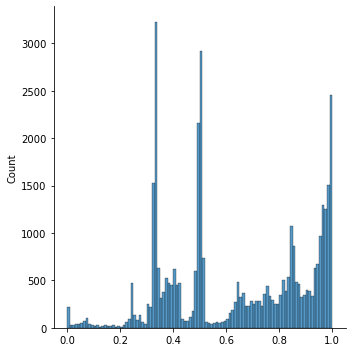

In [22]:
sns.displot(overlap_percentages_2, binwidth = 0.01)

In [23]:
run_all = False
if run_all == True:
    df = pd.DataFrame.from_dict(query_counts, orient='index', columns = ['percentage', 'total', 'count'])
    df.index.name = 'id'
    df.reset_index(inplace=True)
    df.to_csv('/Users/thomasnicholson/phd/RNASeq/srna_seqs/version_1/predicted/overlap_values_3.csv', index=False)

In [27]:
def combined_alignments(query, combined_d, ids_checked, query_matches):
    combined_ids = [query]
    ids_checked.append(query)
    max_query = query
    for i in range(0, len(query_ids)):
        ids =[query, query_ids[i]]
        ids.sort()
        current_id = "_".join(ids)
        if current_id in query_matches:
            if query_ids[i] in ids_checked:
                for key, value in combined_d.items():
                    if query_ids[i] in value:
                        max_query = key
            else:
                combined_ids.append(query_ids[i])
                ids_checked.append(query_ids[i])
                
                
    if max_query in combined_d:
        for item in combined_ids:
            if item not in combined_d[max_query]:
                combined_d[max_query].append(item)
    else:
        combined_d[max_query] = combined_ids
    return(combined_d, ids_checked)



In [29]:
run_all = True
if run_all == True:
    with open('/Users/thomasnicholson/bin/python_git/python_files/query_matches.json', 'r') as read_file:
            query_matches = json.load(read_file)
    
    combined_d = {}
    ids_checked = []
    for query in query_ids:
        if query not in ids_checked:
            combined_d, ids_checked = combined_alignments(query = query, combined_d = combined_d, ids_checked = ids_checked, query_matches = query_matches)

    json_combined_d = json.dumps(combined_d)
    file = open('/Users/thomasnicholson/bin/python_git/python_files/combined_d.json', 'w')
    file.write(json_combined_d)
    file.close()
else:
    with open('/Users/thomasnicholson/bin/python_git/python_files/combined_d.json', 'r') as read_file:
        combined_d = json.load(read_file)  

In [30]:
outfile = open('/Users/thomasnicholson/bin/python_git/python_files/ids_and_overlaps.csv', 'a')
for key, value in query_matches.items():
    names = key.split("_")
    id1 = names[:3]
    id1 = '_'.join(id1)
    id2 = names[3:]
    id2 = '_'.join(id2)
    outfile.write('%s,%s,%s\n' % (id1, id2, value))

In [28]:
full_list = []
for key, value in combined_d.items():
    for item in value:
        full_list.append(item)
unique_list = []
for key, value in combined_d.items():
    for item in value:
        if item not in unique_list:
            unique_list.append(item)
        else:
            print(item)

In [162]:
test_contigs = ['N1', 'N2', 'N3', 'N4']
test_data = {'query_id':['G1', 'G2', 'G3', 'G1', 'G2', 'G3', 'G1', 'G1', 'G3', 'G3', 'G2', 'G3'], 
             'target_contig':['N1', 'N1', 'N1', 'N2', 'N2', 'N2', 'N3', 'N3', 'N3', 'N3', 'N4', 'N4'],
            'target_start':[1, 1, 2, 100, 100, 100, 940, 855, 940, 855, 1010, 1015],
            'target_end':[100, 100, 95, 180, 180, 180, 860, 935, 860, 935, 1110, 1120]}
test_dat = pd.DataFrame(test_data)
print(test_dat)


   query_id target_contig  target_start  target_end
0        G1            N1             1         100
1        G2            N1             1         100
2        G3            N1             2          95
3        G1            N2           100         180
4        G2            N2           100         180
5        G3            N2           100         180
6        G1            N3           940         860
7        G1            N3           855         935
8        G3            N3           940         860
9        G3            N3           855         935
10       G2            N4          1010        1110
11       G3            N4          1015        1120


In [61]:
test_d = {}
for contig in test_contigs:
    print(contig)
    subsetDat =  test_dat.loc[test_dat['target_contig'] == contig]
    print(subsetDat)
    overlap_list = get_overlap_list(subsetDat = subsetDat)
    print(overlap_list)
    test_d = get_overlap_count(overlap_list = overlap_list, d = test_d)

N1
  query_id target_contig  target_start  target_end
0       G1            N1             1         100
1       G2            N1             1         100
2       G3            N1             2          95
[[], ['G1', 'G2', 'G3']]
N2
  query_id target_contig  target_start  target_end
3       G1            N2           100         180
4       G2            N2           100         180
5       G3            N2           100         180
[[], ['G1', 'G2', 'G3']]
N3
  query_id target_contig  target_start  target_end
6       G1            N3           940         860
7       G1            N3           855         935
8       G3            N3           940         860
9       G3            N3           855         935
[[], ['G1', 'G3']]
N4
   query_id target_contig  target_start  target_end
10       G2            N4          1010        1110
11       G3            N4          1015        1120
[[], ['G2', 'G3']]


In [62]:
test_d

{'G1_G2': 2, 'G1_G3': 3, 'G2_G3': 3}

In [158]:
infile=open('/Users/thomasnicholson/phd/RNASeq/RF00177_rep_seqs_all.dists', 'r')

# contig_dat = pd.read_csv("/Users/thomasnicholson/phd/RNASeq/contig_descriptions_all.txt", sep = "\t")

# contigs = contig_dat.iloc[:,0].to_list()

# print(len(contigs))

df = pd.DataFrame(index=range(0,63319),columns=range(0,63319))

i = 0
row_counter = 0
col_colunter = -1

row_names =[]

for line in infile:
    i += 1
#     print(i)
    if i == 1:
        continue
    elif i > 100:
        break
    elif i % 100 == 0:
        print(i)
    line = line.rstrip()
    words = line.split(' ')
    if words[0] != '':
        increment = 7
        col_counter = 0
        row_counter += 1
        row_names.append(words[0])
        df.iloc[row_counter - 1,col_counter:(col_counter + increment)] = words[1:]
        col_counter += increment
    else:
        increment = len(words[1:])
        df.iloc[row_counter - 1,col_counter:(col_counter + increment)] = words[1:]
        col_counter += increment

print(df.iloc[:10,:10])



ValueError: cannot copy sequence with size 8 to array axis with dimension 7

In [ ]:
display(contig_dat)

In [150]:
infile=open('/Users/thomasnicholson/phd/RNASeq/RF00177_rep_seqs_all.dists', 'r')

contig_dat = pd.read_csv("/Users/thomasnicholson/phd/RNASeq/contig_descriptions.txt", sep = "\t")

contigs = contig_dat.iloc[:,0].to_list()

df = pd.DataFrame(index=range(0,296),columns=range(0,296))

i = 0
row_counter = 0
col_colunter = -1

row_names =[]



In [78]:
# print(i)
# print(row_counter)
df.index = row_names
df.columns = row_names
display(df)

df.to_csv('/Users/thomasnicholson/phd/RNASeq/RF00177_rep_MATRIX.dists', index=True)

,NC_010729.,NC_014041.,NZ_CP01238,NZ_CP01081,NC_000922.,NZ_LN84724,NZ_CP01774,NZ_AP01731,NC_017448.,NC_014974.,...,NC_020887.,NC_011898.,NZ_CP01609,NZ_CP01142,NC_012673.,NZ_LT60367,NZ_LT96078,NZ_CP02192,NZ_LT67185,NZ_CP00683
NC_010729.,0.000000,0.254447,0.256403,0.249813,0.408885,0.413726,0.405870,0.452945,0.367433,0.412428,...,1.462057,1.401968,1.445080,1.429717,1.451648,1.494734,1.491975,1.506273,1.450224,1.465367
NC_014041.,0.254447,0.000000,0.130956,0.147333,0.400096,0.407942,0.401658,0.395458,0.366664,0.392047,...,1.454760,1.389718,1.415672,1.426840,1.437881,1.482945,1.461350,1.480629,1.416568,1.454256
NZ_CP01238,0.256403,0.130956,0.000000,0.112169,0.403178,0.404419,0.396563,0.407253,0.343951,0.381255,...,1.448243,1.384392,1.392319,1.371993,1.393892,1.418988,1.418402,1.430263,1.380680,1.388834
NZ_CP01081,0.249813,0.147333,0.112169,0.000000,0.390745,0.390863,0.397856,0.408009,0.366273,0.386278,...,1.467606,1.390145,1.423942,1.405487,1.416489,1.452855,1.445145,1.443939,1.388536,1.422694
NC_000922.,0.408885,0.400096,0.403178,0.390745,0.000000,0.004516,0.065652,0.376960,0.363997,0.363458,...,1.374739,1.398051,1.375979,1.406825,1.416624,1.442280,1.428097,1.472639,1.402313,1.391177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NZ_LT60367,1.494734,1.482945,1.418988,1.452855,1.442280,1.421791,1.437301,1.439042,1.369309,1.346063,...,0.247529,0.221067,0.201228,0.185934,0.167478,0.000000,0.136526,0.143357,0.135746,0.131453
NZ_LT96078,1.491975,1.461350,1.418402,1.445145,1.428097,1.401783,1.417355,1.412864,1.331457,1.338386,...,0.256397,0.243031,0.190974,0.185015,0.191322,0.136526,0.000000,0.102737,0.144436,0.138512
NZ_CP02192,1.506273,1.480629,1.430263,1.443939,1.472639,1.451902,1.454934,1.418566,1.362968,1.374440,...,0.264125,0.252603,0.226090,0.193743,0.196362,0.143357,0.102737,0.000000,0.165498,0.149778
NZ_LT67185,1.450224,1.416568,1.380680,1.388536,1.402313,1.379568,1.406519,1.409485,1.325898,1.353408,...,0.237749,0.226112,0.218158,0.176782,0.145141,0.135746,0.144436,0.165498,0.000000,0.121392


In [146]:
genera = pd.read_csv('/Users/thomasnicholson/bin/python_git/python_files/genera_list.txt', header = None)
df_len = len(genera)

genera['Kingdom'] = 1
genera['Phylum'] = 1
genera['Class'] = 1
genera['Order'] = 1
genera['Family'] = 1
genera['Genus'] = genera.iloc[:,0]

i = -1
for item in genera.iloc[:,0]:
    i += 1
    html_link = 'https://en.wikipedia.org/wiki/%s' % item
    print(html_link)
    
    
    try:
        html_page = urllib.request.urlopen(html_link)
    except urllib.error.HTTPError as exception:
        next
    record_values = False
    pos_val = 0
    taxonomy_levels = []
    for line in html_page:
        mystr = line.decode("utf8")
        if record_values == False:
            if "<td>Kingdom" in mystr:
                record_values = True
            elif "<td>Domain" in mystr:
                record_values = True                
        else:

            if pos_val > 5:
                break
            if 'href="/wiki/' in mystr:
                pos_val += 1
#                 print(pos_val)
                level_name = mystr.split("/")[2]
                level_name = level_name.split('"')[0]
                print(level_name)
#                 print(genera.iloc[i,:])
                genera.iloc[i,pos_val]  = level_name



https://en.wikipedia.org/wiki/Salmonella
1
Bacteria
2
Proteobacteria
3
Gammaproteobacteria
4
Enterobacterales
5
Enterobacteriaceae
6
Salmonella_bongori
https://en.wikipedia.org/wiki/Shigella
1
Bacteria
2
Proteobacteria
3
Gammaproteobacteria
4
Enterobacterales
5
Enterobacteriaceae
6
Shigella_boydii
https://en.wikipedia.org/wiki/Escherichia
1
Bacteria
2
Proteobacteria
3
Gammaproteobacteria
4
Enterobacterales
5
Enterobacteriaceae
6
Type_species
https://en.wikipedia.org/wiki/Enterobacter
1
Bacteria
2
Proteobacteria
3
Gammaproteobacteria
4
Enterobacterales
5
Enterobacteriaceae
6
Enterobacter_cancerogenus
https://en.wikipedia.org/wiki/Plautia
1
Animal
2
Arthropod
3
Insect
4
Hemiptera
5
Pentatomidae
6
Pentatominae
https://en.wikipedia.org/wiki/Klebsiella
1
Bacteria
2
Proteobacteria
3
Gammaproteobacteria
4
Enterobacterales
5
Enterobacteriaceae
6
a><br 
https://en.wikipedia.org/wiki/Kosakonia
https://en.wikipedia.org/wiki/Citrobacter
1
Bacteria
2
Proteobacteria
3
Gammaproteobacteria
4
Enterobac

In [148]:
genera.to_csv("/Users/thomasnicholson/bin/python_git/python_files/genera_taxonomy.csv")

In [143]:
import urllib

html_page = urllib.request.urlopen("https://en.wikipedia.org/wiki/Enterobacter")

record_values = False
i = 0

taxonomy_levels = []
pos_val = 0
for line in html_page:
    
    mystr = line.decode("utf8")
    if record_values == False:
        if "<td>Kingdom" in mystr:
            record_values = True
    else:
#         print(mystr)
#         i += 1
        if pos_val > 5:
            break
        if 'href="/wiki/' in mystr:
            pos_val += 1
            print(mystr)
            level_name = mystr.split("/")[2]
            level_name = level_name.split('"')[0]
            print(level_name)
            taxonomy_levels.append(level_name)

print(taxonomy_levels)

Bacteria
Proteobacteria
Gammaproteobacteria
Enterobacterales
Enterobacteriaceae
Enterobacter_cancerogenus
['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Enterobacterales', 'Enterobacteriaceae', 'Enterobacter_cancerogenus']


In [49]:
from Bio.SeqUtils import GC
inFile = "/Users/thomasnicholson/phd/RNASeq/srna_seqs/version_1/predicted/large_alignments/fasta/alignments_GCA_001559675.1_549.fna"
record = list(SeqIO.parse(inFile, "fasta"))


values = []
for my_seq in record:
    id = my_seq.id
    gc_value = GC(my_seq.seq)
    values.append(gc_value)

In [51]:
print(values)
print(np.mean(values))
print(np.std(values))

[51.274787535410766, 51.274787535410766, 51.274787535410766, 51.274787535410766, 51.274787535410766, 51.274787535410766, 50.991501416430594, 50.991501416430594, 50.42492917847026, 54.11764705882353, 54.11764705882353, 54.11764705882353, 54.11764705882353, 54.11764705882353, 53.8235294117647, 53.0791788856305, 53.0791788856305, 54.437869822485204, 54.142011834319526, 52.55681818181818, 48.10495626822158, 44.37689969604863, 58.610271903323266, 46.706586826347305, 65.13761467889908, 47.09480122324159, 42.72997032640949, 44.582043343653254, 40.06211180124224, 37.2093023255814, 71.33550488599349, 63.38461538461539, 37.764350453172206, 38.006230529595015, 42.68292682926829, 45.61933534743203]
50.69919448229464
7.186095422698659
